In [34]:
from svr import *

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
origin = read_Ydata(1)[-30:]

In [44]:
# without weekday
a = [ 5347.49833582,5392.39590872,5377.73927292,5407.01301216,5371.90072174
,5390.31013899,5410.54255086,5399.8179518, 5387.39993362,5398.66669151
,5395.36184548,5408.909451,5399.30701077,5410.35804218,5364.95170387
,5436.43497862,5356.30149088,5414.81926718,5399.9030044, 5394.8764511
,5441.56124146,5416.24558688,5396.4741338, 5483.47022352,5432.79335302
,5469.69828308,5389.60033789,5401.22284948,5422.63258673,5399.79693637]


In [38]:
# with weekday
b = [ 5303.14602828,4809.62387118,4694.59424366,5479.2931143, 5451.0728965
,5379.14404838,5500.19716229,5375.88986518,4723.02900514,4694.48965685
,5457.9931374, 5586.10426408,5147.29120145,5373.66982066,5267.83866451
,4814.84505963,4766.54844931,5422.7248065, 5353.67745648,5421.99910297
,5634.07085808,5632.7970587, 5063.48269243,5047.26799126,5648.03390707
,5657.48233377,5568.27740223,5322.97700815,5348.9367015, 4965.95472863]


In [48]:
# only weekday
c = [ 5012.87803617,4994.5560554, 4810.35616279,5457.04564658,5394.02806235
,5264.01194478,5353.40803848,5202.80160597,4985.01595508,4835.96932258
,5444.48961082,5570.01401931,5105.56186406,5244.48442792,5046.93496284
,5117.14125198,4884.40568872,5414.95909699,5267.39102745,5299.13522169
,5526.11492909,5465.94174177,5320.53417248,5348.77460554,5718.27434452
,5739.57264323,5410.9855598, 5205.49819456,5329.07956606,5148.30170918]

In [39]:
def estimate(a, b):
    sum = 0
    for index, val in enumerate(a):
        sum += ((float(val) - float(b[index])) ** 2)
    sum = sum / len(a)
    return sum ** (0.5)

print estimate(a, origin)
print estimate(b, origin)

688.774055132
667.188649166


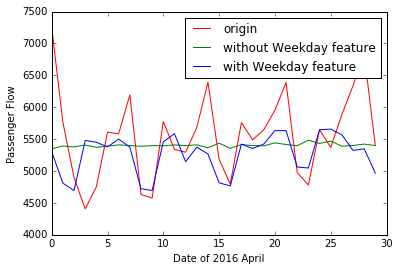

In [43]:
plt.plot(origin, 'r', label="origin")
plt.plot(a, 'g', label="without Weekday feature")
plt.plot(b, 'b', label="with Weekday feature")
plt.xlabel("Date of 2016 April")
plt.ylabel("Passenger Flow")
plt.legend()
plt.show()

In [49]:
print estimate(c, origin)

739.79501668


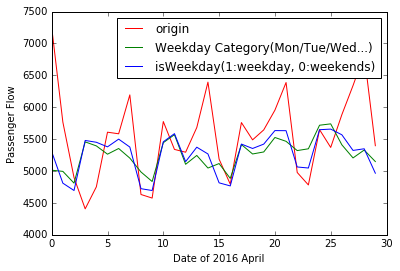

In [54]:
plt.plot(origin, 'r', label="origin")
plt.plot(c, 'g', label="Weekday Category(Mon/Tue/Wed...)")
plt.plot(b, 'b', label="isWeekday(1:weekday, 0:weekends)")
plt.xlabel("Date of 2016 April")
plt.ylabel("Passenger Flow")
plt.legend()
plt.show()

In [64]:
# station 43
origin43 =[ 43008.,39178.,34605.,29155.,32940.,35440.,37371.,42088.,44504.
,35606.,33555.,36180.,36551.,37708.,43001.,46367.,35532.,34325.
,36109.,38023.,37833.,44523.,45764.,37050.,33890.,36538.,38042.
,38694.,45027.,46073.]
d = [ 36602.42749038, 36582.3137226,  36582.31370593, 36294.53340798
, 36468.78174615, 36470.73312798, 36492.59068332, 36582.77464441
, 36582.85992259, 36593.72158318, 36511.67837089, 36501.71935844
, 36576.77760102, 36603.64822905, 36547.4560877,  36607.56051724
, 36653.97766769, 36629.44332779, 36582.65433333, 36522.53943421
, 36582.25028066, 36707.40255813, 36670.90368699, 36641.45166356
, 36209.65115119, 36477.24395437, 36604.8459176,  36578.94764755
, 36578.85956396, 36582.71698554]
e =[42151.855506866297,41498.883990993396,35664.472389899114,34156.500924473607,35681.098376586015,35685.509711066734,36426.795060969889,40002.799998004324,40072.712965941864,35321.839096867363,34609.960547711948,37096.737844572854,36486.837896254372,36252.951949257265,39634.62569382292,39801.434308615368,35551.167011356069,35174.757405415869,37680.8753214627,36678.876294120528,35959.064953756802,39043.620146515183,39290.08635755576,35517.044679640865,35479.20564340541,38026.033365301722,36806.645481496482,35765.02963836641,38694.291310181477,39051.972560126269
]

In [65]:
print estimate(d, origin43)
print estimate(e, origin43)

4781.31877516
3216.3164356


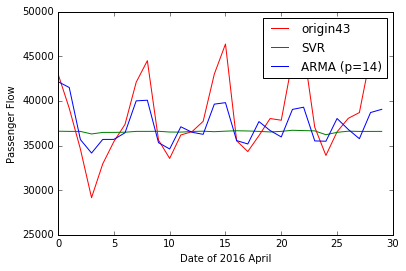

In [67]:
plt.plot(origin43, 'r', label="origin43")
plt.plot(d, 'g', label="SVR")
plt.plot(e, 'b', label="ARMA (p=14)")
plt.xlabel("Date of 2016 April")
plt.ylabel("Passenger Flow")
plt.legend()
plt.show()

We use MSE(Mean squared error of each day's passenger flow) as our estimator:
$$estimation = \sqrt{ \sum_{2016April}(Flow_{predicted} -Flow_{ans})^2 }$$

In [82]:
aa = [ 5303.14602828, 4809.62387118, 4694.59424366, 5479.2931143,  5451.0728965
, 5379.14404838, 5500.19716229, 5375.88986518, 4723.02900514, 4694.48965685
, 5457.9931374,  5586.10426408, 5147.29120145, 5373.66982066, 5267.83866451
, 4814.84505963, 4766.54844931, 5422.7248065,  5353.67745648, 5421.99910297
, 5634.07085808, 5632.7970587,  5063.48269243, 5047.26799126, 5648.03390707
, 5657.48233377, 5568.27740223, 5322.97700815, 5348.9367015,  4965.95472863]
bb = [ 5303.14602828, 4809.62387118, 4694.59424366, 5479.2931143,  5451.0728965
, 5379.14404838, 5500.19716229, 5375.88986518, 4723.02900514, 4694.48965685
, 5457.9931374,  5586.10426408, 5147.29120145, 5373.66982066, 5267.83866451
, 4814.84505963, 4766.54844931, 5422.7248065,  5353.67745648, 5421.99910297
, 5634.07085808, 5632.7970587,  5063.48269243, 5047.26799126, 5648.03390707
, 5657.48233377, 5568.27740223, 5322.97700815, 5348.9367015,  4965.95472863]

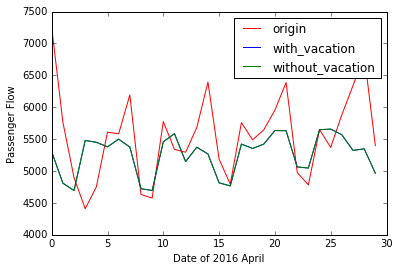

In [89]:
plt.plot(origin, 'r', label="origin")
plt.plot(aa, 'b', label="with_vacation")
plt.plot(bb, 'g', label="without_vacation")
plt.xlabel("Date of 2016 April")
plt.ylabel("Passenger Flow")
plt.legend()
plt.show()

In [90]:
print estimate(aa, origin)
print estimate(bb, origin)

667.188649166
667.188649166


In [91]:
cc = [ 36594.65434035, 36531.91450463, 36496.03421645, 35781.98632748
, 36135.57018308, 36285.66962017, 36378.88626661, 36532.11452366
, 36575.82175157, 36583.42624328, 36376.86142278, 36265.27724004
, 36496.95894902, 36554.51423628, 36441.18015024, 36535.9768778
, 36857.46163339, 36631.99085034, 36547.01658675, 36352.46877291
, 36445.73807397, 36686.461392, 36606.55003691, 36658.06530924
, 35703.43094974, 36238.16272575, 36597.89609353, 36453.95414104
, 36565.03375023, 36547.01269956]

dd = [ 36609.58044147, 36595.80266191, 36595.74037346, 35802.84580876
, 36147.01948191, 36311.31434817, 36386.06924457, 36575.19607477
, 36560.27943093, 36551.85696291, 36415.21613323, 36295.99821874
, 36550.0113396,  36561.64652734, 36421.74458027, 36519.07923521
, 36723.29900141, 36676.90969153, 36594.0910706,  36372.42695653
, 36431.29529579, 36680.27529302, 36626.99371481, 36694.67944164
, 35704.41601912, 36252.2145728,  36640.37371693, 36457.52447099
, 36599.43076274, 36596.416018, ]

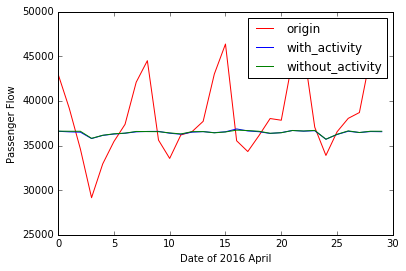

In [94]:
plt.plot(origin43, 'r', label="origin")
plt.plot(cc, 'b', label="with_activity")
plt.plot(dd, 'g', label="without_activity")
plt.xlabel("Date of 2016 April")
plt.ylabel("Passenger Flow")
plt.legend()
plt.show()

In [93]:
print estimate(cc, origin)
print estimate(dd, origin)

30902.5016016
30918.7548187
